## Compare Results

A couple of these stars have existing $\nu\sin(i)$ measurements. Let's compare them to see if we find ourselves in the right ballpark.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import astropy.units as u
import mystyle


sns.set_palette('colorblind')
import mystyle
plt.style.use(mystyle.ms)

ati = pd.read_csv('../../data/atium.csv',index_col=0)

#Exclude those stars with a Rhat > 1.1 flag and no results otherwise
ati = ati[np.isfinite(ati.nus.values)]
ati = ati[ati.chainflag == 0 ]
print('We have {} stars'.format(len(ati)))

We have 49 stars


In [2]:
lit = pd.DataFrame()
lit['KIC'] = ati.KIC.copy()

Read in Campante et al. 2015 Periods

In [3]:
C15 = pd.read_csv('../../data/campante_2015.txt',sep='\s+')
lit = pd.merge(lit, C15, on='KIC', how='left')

Read in LEGACY vsini values

In [4]:
L16 = pd.read_csv('../../data/malatium.csv',usecols=['KIC','vsini']).rename(columns={'vsini':'L16_vsini'})
lit = pd.merge(lit, L16, on='KIC', how='left')

Add the Davies et al. 16 16 Cyg A & B data

16CygA = 12069424 |
16CygB = 12069449

In [5]:
lit['D16_vsini'] = np.nan
lit['D16_evsini'] = np.nan
lit['D16_P_rot'] = np.nan
lit['D16_u_eP_rot'] =np.nan
lit['D16_l_eP_rot'] =np.nan


lit[lit.KIC == 12069424]['D16_vsini'] = 2.23
lit[lit.KIC == 12069424]['D16_evsini'] = 0.07
lit[lit.KIC == 12069424]['D16_P_rot'] = 23.8
lit[lit.KIC == 12069424]['D16_u_eP_rot'] = 1.5
lit[lit.KIC == 12069424]['D16_l_eP_rot'] = 1.8

lit[lit.KIC == 12069449]['D16_vsini'] = 1.35
lit[lit.KIC == 12069449]['D16_evsini'] = 0.08
lit[lit.KIC == 12069449]['D16_P_rot'] = 23.2
lit[lit.KIC == 12069449]['D16_u_eP_rot'] = 11.5
lit[lit.KIC == 12069449]['D16_l_eP_rot'] = 3.2

Add the Nielsen et al. 2015 Rotation periods

In [24]:
lit['N15_P_rot'] = np.nan
lit['N15_u_eP_rot'] =np.nan
lit['N15_l_eP_rot'] =np.nan

lit.loc[lit.KIC == 4914923, 'N15_P_rot'] = 17.98
lit.loc[lit.KIC == 4914923, 'N15_u_eP_rot'] = 3.17
lit.loc[lit.KIC == 4914923, 'N15_l_eP_rot'] = 2.27

lit.loc[lit.KIC == 5184732, 'N15_P_rot'] = 19.44
lit.loc[lit.KIC == 5184732, 'N15_u_eP_rot'] = 1.63
lit.loc[lit.KIC == 5184732, 'N15_l_eP_rot'] = 2.13

lit.loc[lit.KIC == 6116048, 'N15_P_rot'] = 17.61
lit.loc[lit.KIC == 6116048, 'N15_u_eP_rot'] = 0.95
lit.loc[lit.KIC == 6116048, 'N15_l_eP_rot'] = 1.31

lit.loc[lit.KIC == 6933899, 'N15_P_rot'] = 29.92
lit.loc[lit.KIC == 6933899, 'N15_u_eP_rot'] = 4.90
lit.loc[lit.KIC == 6933899, 'N15_l_eP_rot'] = 6.76

lit.loc[lit.KIC == 10963065, 'N15_P_rot'] = 12.01
lit.loc[lit.KIC == 10963065, 'N15_u_eP_rot'] = 1.42
lit.loc[lit.KIC == 10963065, 'N15_l_eP_rot'] = 1.09

Add the Benomar et al. 18 latitudinal rotation periods

We will use the $a1$ parameter, which in this case should be equal to the global rotational splitting.

In [6]:
B18 = pd.read_csv('../../data/benomar_2018_rot.txt', sep='\s+')

In [9]:
B18['lowa1'] = B18['a1'] - B18['l_a1']
B18['upa1'] = B18['a1'] + B18['u_a1']

B18['B18_P_rot'] = (1./u.Quantity(B18['a1'].values, u.nanohertz).to(1/u.day)).value
B18['B18_l_eP_rot'] = (1./u.Quantity(B18['lowa1'].values, u.nanohertz).to(1/u.day)).value - B18['B18_P_rot']
B18['B18_u_eP_rot'] = B18['B18_P_rot'] - (1./u.Quantity(B18['upa1'].values, u.nanohertz).to(1/u.day)).value

In [16]:
lit = pd.merge(lit, B18[['KIC','B18_P_rot','B18_l_eP_rot','B18_u_eP_rot']], on='KIC', how='left')

Plot $v\sin(i)$

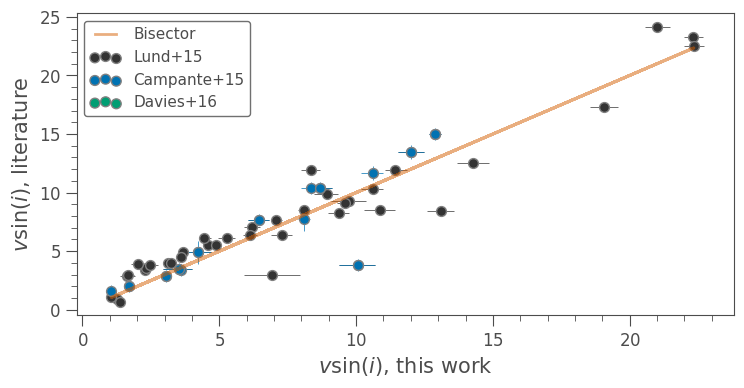

In [18]:
with plt.style.context(mystyle.ms):
    fig, ax = plt.subplots()
    c = ax.scatter(ati['vsini'], lit['L16_vsini'], lw=1, ec='gray',s=50, zorder=2, label='Lund+15')
    plt.errorbar(ati['vsini'], lit['L16_vsini'], xerr=[ati['l_vsini'], ati['u_vsini']],
                fmt='|', zorder=1)

    c = ax.scatter(ati['vsini'], lit['C15_vsini'], lw=1, ec='gray',s=50, zorder=2, label='Campante+15')
    plt.errorbar(ati['vsini'], lit['C15_vsini'], xerr=[ati['l_vsini'], ati['u_vsini']], yerr=lit['C15_evsini'],
                fmt='|', zorder=1)
    
    c = ax.scatter(ati['vsini'], lit['D16_vsini'], lw=1, ec='gray',s=50, zorder=2, label='Davies+16')
    plt.errorbar(ati['vsini'], lit['D16_vsini'], xerr=[ati['l_vsini'], ati['u_vsini']], yerr=lit['D16_evsini'],
                fmt='|', zorder=1)
    
    plt.plot(ati['vsini'],ati['vsini'],lw=2, alpha=.5, label='Bisector')
    
    ax.set_axisbelow(True)
    ax.set_xlabel(r'$v\sin(i)$, this work')
    ax.set_ylabel(r'$v\sin(i)$, literature')
    ax.legend()
    plt.show()



Plot Periods

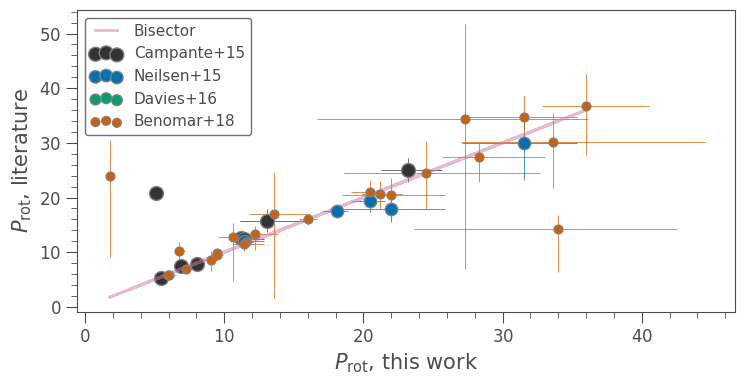

In [27]:
with plt.style.context(mystyle.ms):
    fig, ax = plt.subplots()
    c = ax.scatter(ati['P'], lit['C15_P_rot'], lw=1, ec='gray',s=100, zorder=2, label='Campante+15')
    plt.errorbar(ati['P'], lit['C15_P_rot'], xerr=[ati['l_P'], ati['u_P']], yerr=lit['C15_eP_rot'],
                fmt='|', zorder=1)

    c = ax.scatter(ati['P'], lit['N15_P_rot'], lw=1, ec='gray',s=80, zorder=3, label='Neilsen+15')
    plt.errorbar(ati['P'], lit['N15_P_rot'], xerr=[ati['l_P'], ati['u_P']],
                 yerr=[lit['N15_l_eP_rot'],lit['N15_u_eP_rot']],
                 fmt='|', zorder=1)        
    
    c = ax.scatter(ati['P'], lit['D16_P_rot'], lw=1, ec='gray',s=60, zorder=4, label='Davies+16')
    plt.errorbar(ati['P'], lit['D16_P_rot'], xerr=[ati['l_P'], ati['u_P']],
                 yerr=[lit['D16_l_eP_rot'],lit['D16_u_eP_rot']],
                 fmt='|', zorder=1)
    
    c = ax.scatter(ati['P'], lit['B18_P_rot'], lw=1, ec='gray',s=40, zorder=5, label='Benomar+18')
    plt.errorbar(ati['P'], lit['B18_P_rot'], xerr=[ati['l_P'], ati['u_P']],
                 yerr=[lit['B18_l_eP_rot'],lit['B18_u_eP_rot']],
                 fmt='|', zorder=1)
    

    plt.plot(ati['P'],ati['P'],lw=2, alpha=.5, label='Bisector')
    
    ax.set_axisbelow(True)
    ax.set_ylabel(r'$P_{\rm rot}$, literature')
    ax.set_xlabel(r'$P_{\rm rot}$, this work')
    ax.legend()
    plt.show()

